In [3]:
goog = True
if goog:
  from google.colab import drive
  drive.mount("/content/drive")
  base = "/content/drive/MyDrive/Wine_quality_dataset/"
else:
  base = "0.Practice/Wine_quality_dataset/"

Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = pd.read_csv(base + "train.csv")
y = X.pop("quality")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state = 42)

X_test = pd.read_csv( base + "test.csv")

In [8]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

base_model = CatBoostRegressor(verbose=0, random_state = 42)
base_model.fit(X_train, y_train)
preds = base_model.predict(X_valid)

print('Cat boost MSE:', mean_squared_error(y_valid, preds))

Cat boost MSE: 0.5187771550583358


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([('num', StandardScaler(), X_train.columns)])

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())
                             ])

model = my_pipeline
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print('Linear MSE:', mean_squared_error(y_valid, preds))

Linear MSE: 0.5222096186359333


In [ ]:
...

Ellipsis

<Axes: >

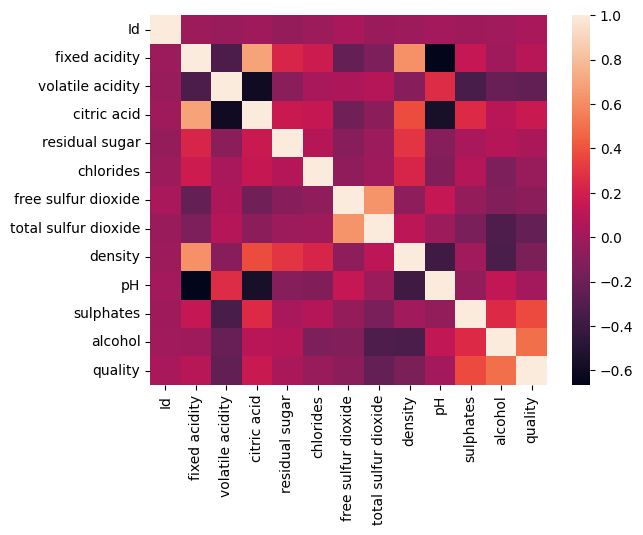

In [10]:
import seaborn as sns
X_y_train = pd.concat([X_train, y_train], axis=1)
sns.heatmap(X_y_train.corr())

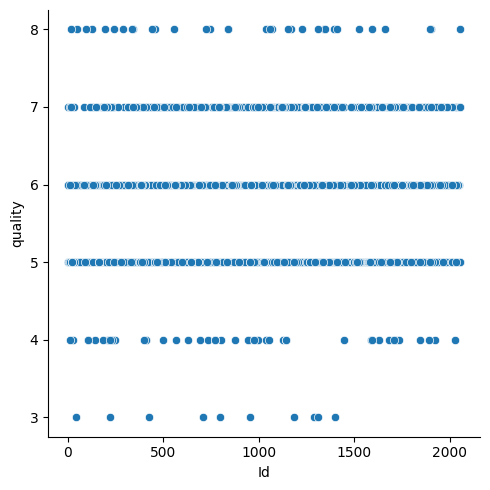

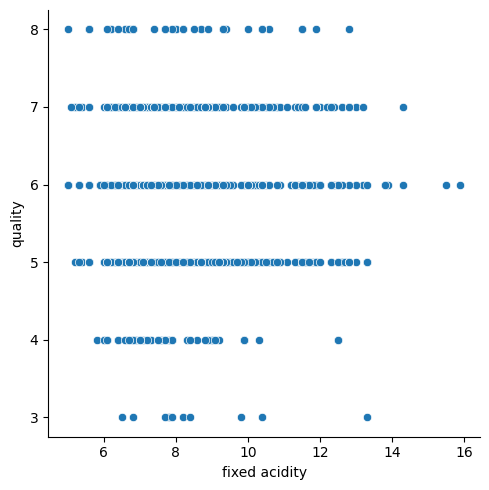

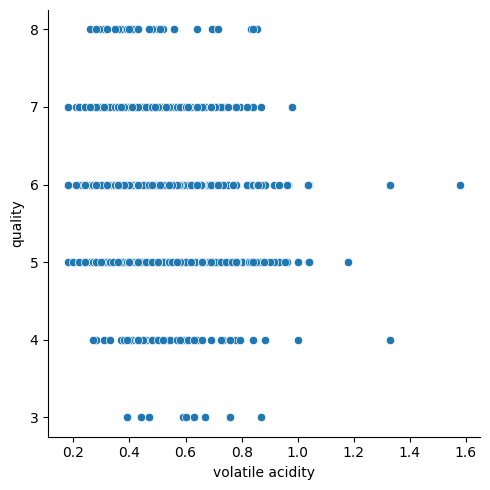

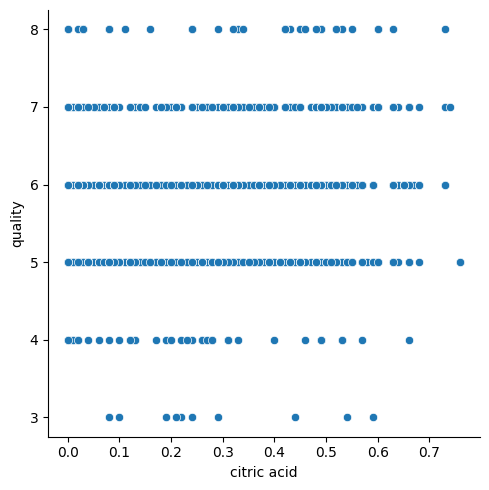

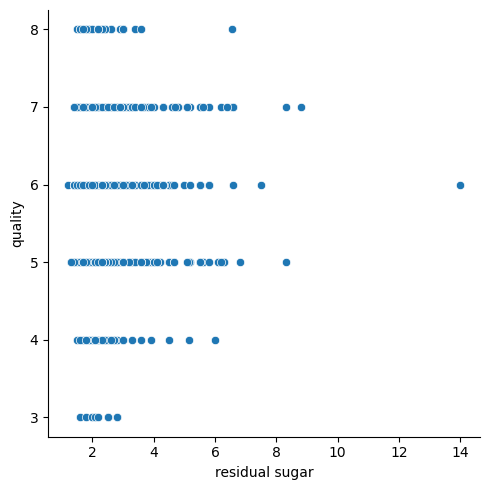

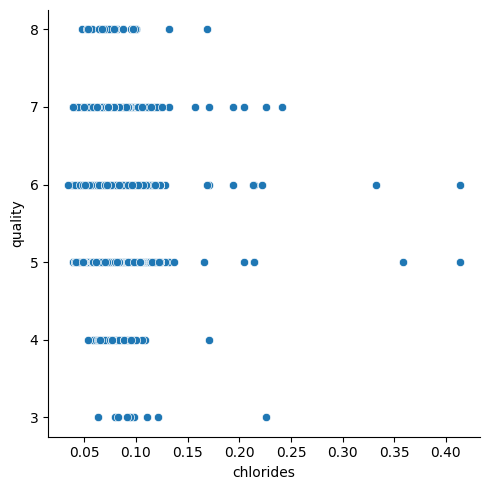

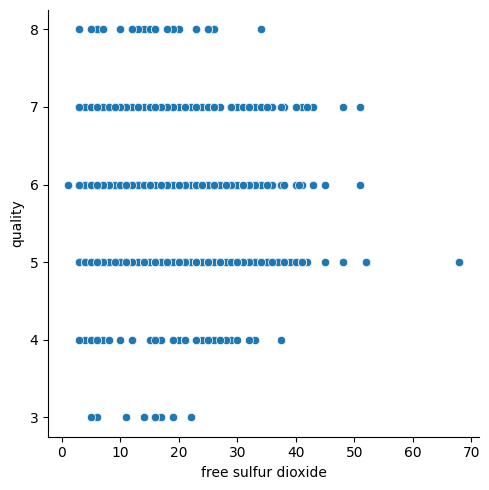

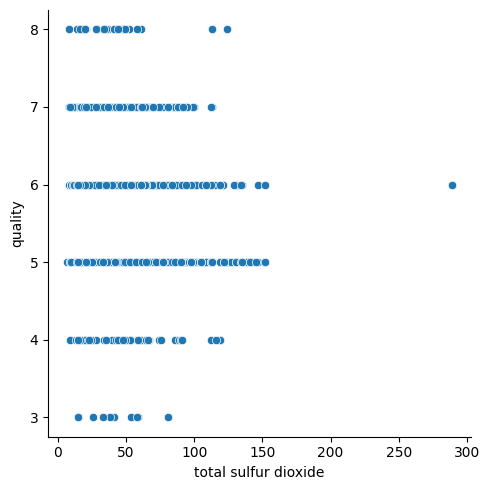

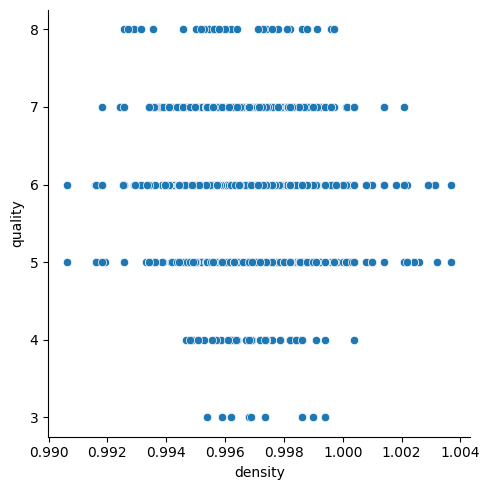

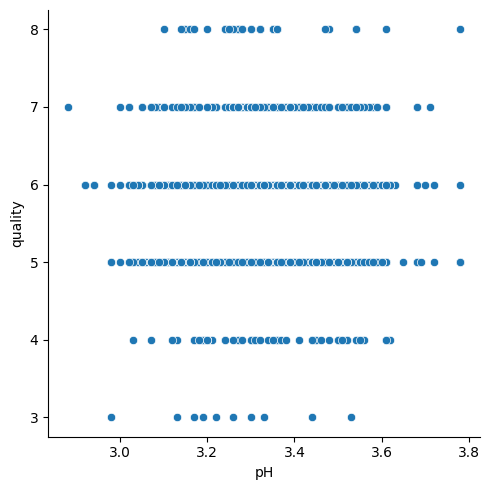

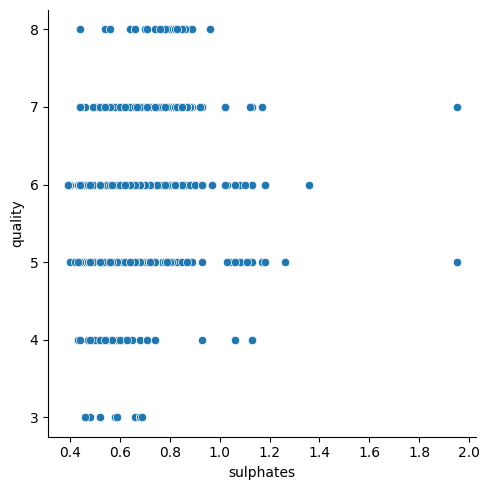

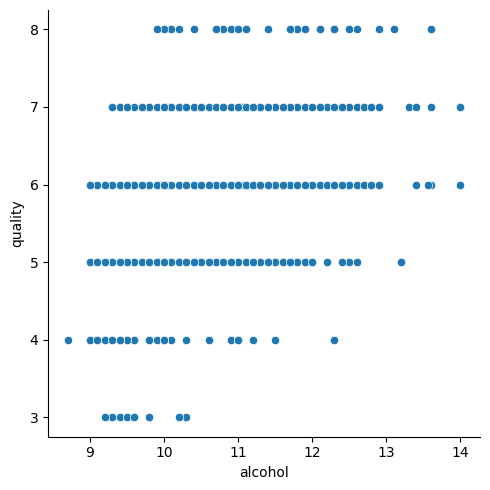

In [11]:
for i in X_train.columns:
  sns.relplot(data=X_y_train, x=i, y="quality")

In [12]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, random_state = 42)
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print('Cat boost classifier MSE:', mean_squared_error(y_valid, preds))

Cat boost classifier MSE: 0.6262135922330098


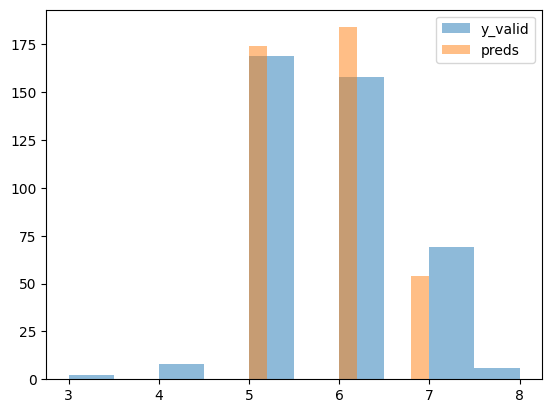

In [13]:
import matplotlib.pyplot as plt

plt.hist(y_valid, alpha = 0.5, label = "y_valid")
plt.hist(preds, alpha = 0.5, label = "preds")
plt.legend()
plt.show()

#Idea: using rmse we need to pay more attention to the edges of ditribuition

OneVsRestClassifier with kneighboors MSE: 1.3786407766990292


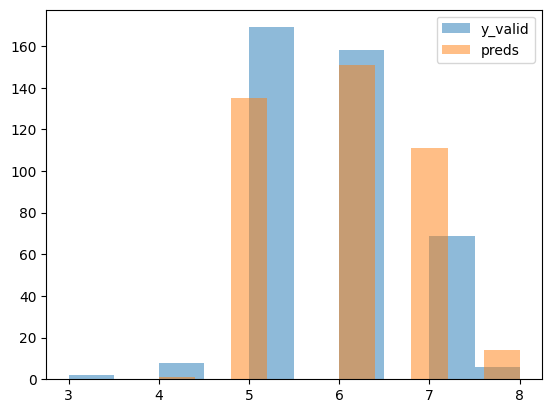

quality
5    169
6    158
7     69
4      8
8      6
3      2
Name: count, dtype: int64


In [84]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3)).fit(X, y)
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print('OneVsRestClassifier with kneighboors MSE:', mean_squared_error(y_valid, preds))
plt.hist(y_valid, alpha = 0.5, label = "y_valid")
plt.hist(preds, alpha = 0.5, label = "preds")
plt.legend()
plt.show()
print(y_valid.value_counts())